Shape: (31780, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26  

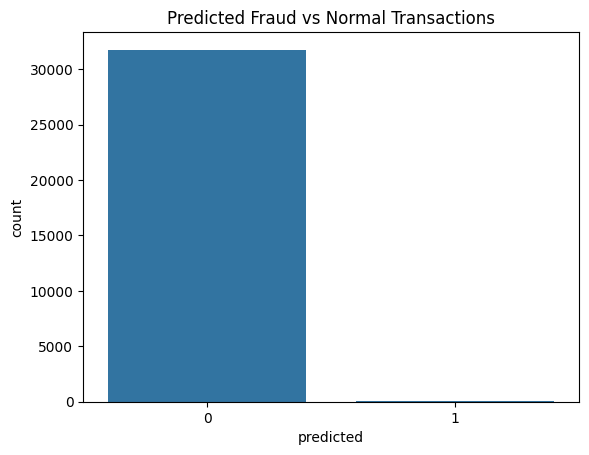

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("creditcard.csv")
print("Shape:",df.shape)
print(df.head())
df=df.dropna(subset=['Class'])
X=df.drop("Class",axis=1)
y=df["Class"]
model=IsolationForest(n_estimators=100,contamination=0.001)
model.fit(X)
df["predicted"]=model.predict(X)
df["predicted"]=df["predicted"].map({1: 0,-1: 1})
print("\nConfusion Matrix:")
print(confusion_matrix(y,df["predicted"]))
print("\nClassification Report:")
print(classification_report(y,df["predicted"]))
sns.countplot(x="predicted",data=df)
plt.title("Predicted Fraud vs Normal Transactions")
plt.show()
